### Omar Abdelmotaleb
### Assignment 2
### CS-559-B
### I pledge my honor that I have abided by the Stevens Honor System.

In [1085]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
# np.set_printoptions(threshold=sys.maxsize)

K = 30


# 1. Load the face images (do not customize the original data, face 103 is missing, simply ignore it)

In [1086]:
# Store the images in a list
face_data = []

# Specified directory for all of the
directory = "face_data"

# Iterate through the files in specified directory
# Add them to face_data

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Append all .bmp's to the face_data list
        face_data.append(Image.open(f))


### 2. Flatten the image to row vector (256\*256 => 1\*65536)
### 3. Combine all the data together ( => 177*65536 )

In [1087]:
# Now let's process it to be 1-dimensional

face_data = list(map(np.array, face_data))
face_data_1d = []

for img in face_data:
    # record original shape
    shape = img.shape
    # make a 1D view of the img
    flat_img = img.ravel()
    # append it to our 1d data
    face_data_1d.append(flat_img)


# 4. Split data to the training set and testing set

In [1088]:
# Sizes of train and test data
n_train = 157
n_test = 20
# Partition the images by the size of the train and test sets
face_train = np.array(face_data_1d[0:n_train])
face_test = np.array(face_data_1d[-n_test:])


# 5. Compute mean image of the training set and subtract it from training data ( Y = X - avg(X))

In [1089]:
# Computes the mean image
face_train_mean = face_train.mean(axis=0)
# Subtracts the mean image from each image in face_train
face_pca = np.subtract(face_train, face_train_mean)


# 6. Compute covariance matrix ( Y * Y_t / size_train ) (size of cov matrix => size_train *( size_train)

In [1090]:
face_pca_t = np.transpose(face_pca)
# Y * Y_t / size_train = the covariance matrix
yy_t = np.dot(face_pca, face_pca_t)
cov = np.divide(yy_t, n_train)


# 7. Do the eigen decomposition

In [1091]:
eigenvalues, eigenvectors = np.linalg.eig(cov)


# 8. Pick the top K eigenvectors base on the K largest eigenvalues

In [1092]:
# Top K = 30 eigenfaces computed

eigenvalues_index_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted       = eigenvalues[eigenvalues_index_sorted][0:K]
# eigenvectors_sorted    = eigenvectors[:, eigenvalues_index_sorted]
eigenvectors_sorted      = eigenvectors[:,eigenvalues_index_sorted][:,0:K]


# 9. Do the projection to get the eigenfaces (Y_t * eigenvectors) (=> 65536*K)

In [1093]:
# I can't do it on the top K eigenvectors, so am I supposed to compute the K=30 Eigenfaces after?
eigenfaces = np.dot(face_pca_t, eigenvectors_sorted)


# 10. Normalize the Eigenfaces

In [1094]:
eigenfaces_normal = eigenfaces / np.linalg.norm(eigenfaces, axis=0)


# 11. Reshape the first K columns to 256*256 and display the eigenface image

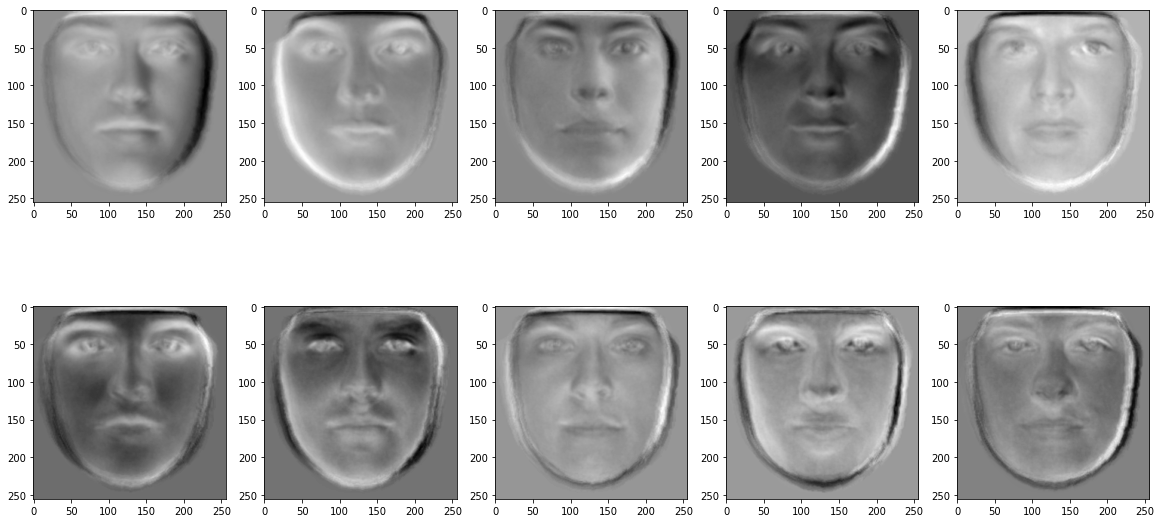

In [1095]:
# NOTE: The Homework PDF says to visualize the top 10 eigenfaces.
# Change the number 10 if you want to see more. -Omar

fig = plt.figure(figsize=(20, 10))
for i in range(10):
    v = eigenfaces_normal[:, i]
    r = np.asarray(v).reshape(256, 256)
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(r, cmap='gray')

plt.savefig(f"figures/K={K}_eigenfaces.pdf")


# 12. Use first K eigenfaces to reconstruct face images (test - avg(X)) * eigenface * eigenface_t + avg(X))
<br>test - avg(X) 
<br>=> (test_size , 65536)
<br><br>(test - avg(X)) * eigenface
<br>=> (test_size, K)
<br><br>(test - avg(X)) * eigenface * eigenface_t 
<br>=> (test_size, 65536)
<br><br>(test - avg(X)) * eigenface * eigenface_t + avg(X) 
<br>=> (test_size, 65536)
# 13. Reshape and display the reconstructed face

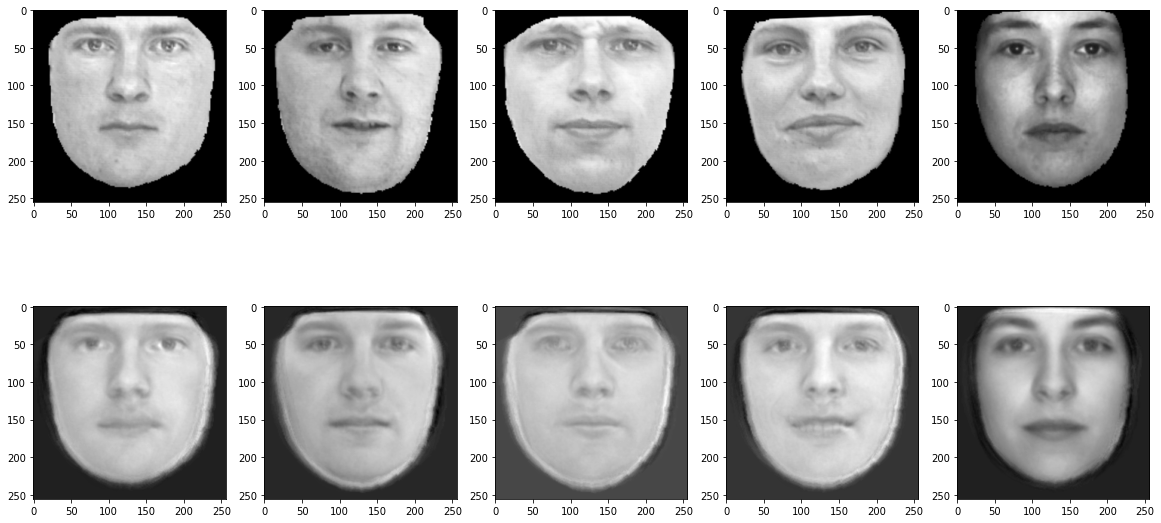

In [1096]:
eigenfaces_normal_k_t = np.transpose(eigenfaces_normal)

test_t      = face_test     - face_train_mean
test_t_e    = test_t        @ eigenfaces_normal
test_t_e_et = test_t_e      @ eigenfaces_normal_k_t
test_final  = test_t_e_et   + face_train_mean


fig_r = plt.figure(figsize=(20, 10))
i = 1

for v in face_test:
    r = np.asarray(v).reshape(256, 256)
    fig_r.add_subplot(2, 5, i)
    i += 1
    plt.imshow(r, cmap="gray")
    if i > 5:
        break

for v in test_final:
    r = np.asarray(v).reshape(256, 256)
    fig_r.add_subplot(2, 5, i)
    i += 1
    plt.imshow(r, cmap="gray")
    if i > 10:
        break

plt.savefig(f"figures/K={K}_test_vs_reconstructed.pdf")

# 14. Compute the error value (sum(sum(reconstructed - original) ^ 2) / test_size

#### You can also do absolute value of the error, test size can be the number of the test images, or it can be the total number of pixels (number of images * 256 * 256)

In [1097]:
diff    = test_final - face_test
sdiff   = sum(diff) ** 2
sq_diff = sum(sdiff)

error   = sq_diff / n_test

print("For K =", K, "the reconstruction error is:", error)


For K = 30 the reconstruction error is: 23347157.383341566


# 15. Try different numbers of K, plot the error (K as x-axis, error value as y-axis)

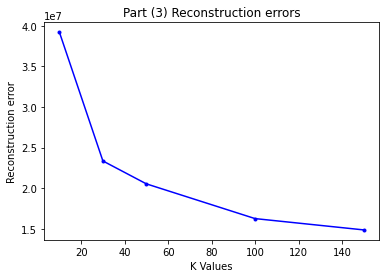

In [1098]:
k_values = [10, 30, 50, 100, 150]
k_errors = [39215338.12742461, 23347157.383341566,
            20523927.563391093, 16242962.883069996, 14848242.96413517]

plt.plot(k_values, k_errors, color = "blue", marker=".")
plt.title('Part (3) Reconstruction errors')
plt.xlabel('K Values')
plt.ylabel('Reconstruction error')
plt.show()
